In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

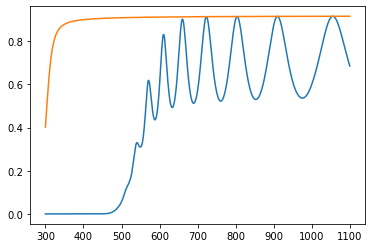

In [2]:
df=pd.read_excel('Datos.xlsx')
df['s']=1/df['T_s']+(1/(df['T_s'])**2-1)**.5
plt.plot(df['lambda'],df['T_p'])
plt.plot(df['lambda'],df['T_s'])

In [3]:
second=0
for i in range(200,df['lambda'].shape[0]):
    if df['T_p'][i-1]<df['T_p'][i] and df['T_p'][i]>df['T_p'][i+1]:
        mediumcut=i
        second+=1
        if(second==2):
            break

In [4]:
cut=df[mediumcut:].copy().reset_index().drop(['index'],axis=1)
cut['s']=1/cut['T_s']+(1/(cut['T_s'])**2-1)**.5

In [5]:
ismin=0
second=0
for i in range(1,cut['lambda'].shape[0]-1):
    if abs(cut['T_p'][i]-cut['T_s'][i])<0.00001:
        hardcut=i+5
        second+=1
        if(second==2):
            break
trans=cut[hardcut:].copy().reset_index().drop(['index'],axis=1)
cut=cut[:hardcut].copy()
cut

,lambda,T_p,T_s,LE,UE,s
0,571,0.61877,0.91112,0.38720,0.61877,1.549896
1,572,0.61631,0.91115,0.39043,0.62694,1.549772
2,573,0.61101,0.91117,0.39362,0.63493,1.549690
3,574,0.59969,0.91120,0.39676,0.64275,1.549566
4,575,0.58527,0.91122,0.39987,0.65039,1.549483
...,...,...,...,...,...,...
339,910,0.91483,0.91483,0.53322,0.91483,1.534536
340,911,0.91427,0.91484,0.53327,0.91483,1.534494
341,912,0.91286,0.91484,0.53333,0.91484,1.534494
342,913,0.91062,0.91485,0.53338,0.91484,1.534452


In [6]:
s=np.mean(cut['s'])
trans['M']=2*s/trans['LE']-(s*s+1)/2
cut['N']=2*s*(cut['UE']-cut['LE'])/(cut['UE']*cut['LE'])+(s*s+1)/2

In [7]:
trans['n']=(trans.M+(trans.M**2-trans.s**2)**.5)**.5
cut['n']=(cut.N+(cut.N**2-cut.s**2)**.5)**.5

In [8]:
ext=[]

for i in range(1,cut['lambda'].shape[0]-1):
    if (cut['T_p'][i-1]<cut['T_p'][i] and cut['T_p'][i]>cut['T_p'][i+1]) or (cut['T_p'][i-1]>cut['T_p'][i] and cut['T_p'][i]<cut['T_p'][i+1]):
        ext+=[i]
ext2=ext        
ext=cut.copy().loc[ext].reset_index().drop(['index'],axis=1).copy()
ext['d']=0
ext

,lambda,T_p,T_s,LE,UE,s,N,n,d
0,588,0.43551,0.91152,0.43551,0.73522,1.548244,4.568798,2.977796,0
1,611,0.83093,0.91200,0.47442,0.83093,1.546261,4.471299,2.943930,0
2,633,0.49233,0.91239,0.49233,0.87813,1.544649,4.434364,2.931041,0
3,660,0.90196,0.91281,0.50461,0.90196,1.542911,4.374788,2.910063,0
4,690,0.51235,0.91320,0.51235,0.91135,1.541296,4.317764,2.889820,0
5,723,0.91353,0.91356,0.51783,0.91353,1.539805,4.262210,2.869940,0
6,761,0.52226,0.91391,0.52226,0.91400,1.538354,4.213491,2.852388,0
7,804,0.91424,0.91424,0.52623,0.91424,1.536985,4.169884,2.836577,0
8,853,0.52989,0.91455,0.52989,0.91451,1.535698,4.130451,2.822198,0
9,910,0.91483,0.91483,0.53322,0.91483,1.534536,4.095329,2.809322,0


In [9]:
for i in range(2,ext.shape[0]):
    ext['d'][i]=(.5*ext['lambda'][i]*ext['lambda'][i-2])/(ext['lambda'][i]*ext['n'][i-2]-ext['n'][i]*ext['lambda'][i-2])

<ipython-input-9-14d4b2b2d96d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext['d'][i]=(.5*ext['lambda'][i]*ext['lambda'][i-2])/(ext['lambda'][i]*ext['n'][i-2]-ext['n'][i]*ext['lambda'][i-2])


In [10]:
ext['m']=round(4*ext['n']*ext['d']/ext['lambda'])/2
ext['m'][3]=10
ext['dp']=ext['m']*ext['lambda']/(2*ext['n'])
ext['np']=ext['m']*ext['lambda']/(2*ext['dp'])
ext=ext.dropna().reset_index().drop(['index'],axis=1)

<ipython-input-10-89aa33f1a155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext['m'][3]=10


In [11]:
d=np.mean(ext['dp'])
d

1133.799330355386

In [12]:
ext

,lambda,T_p,T_s,LE,UE,s,N,n,d,m,dp,np
0,633,0.49233,0.91239,0.49233,0.87813,1.544649,4.434364,2.931041,1152,10.5,1133.812087,2.931041
1,660,0.90196,0.91281,0.50461,0.90196,1.542911,4.374788,2.910063,1222,10.0,1133.996086,2.910063
2,690,0.51235,0.91320,0.51235,0.91135,1.541296,4.317764,2.889820,1130,9.5,1134.153582,2.889820
3,723,0.91353,0.91356,0.51783,0.91353,1.539805,4.262210,2.869940,1137,9.0,1133.647231,2.869940
4,761,0.52226,0.91391,0.52226,0.91400,1.538354,4.213491,2.852388,1136,8.5,1133.874645,2.852388
5,804,0.91424,0.91424,0.52623,0.91424,1.536985,4.169884,2.836577,1132,8.0,1133.760669,2.836577
6,853,0.52989,0.91455,0.52989,0.91451,1.535698,4.130451,2.822198,1137,7.5,1133.424939,2.822198
7,910,0.91483,0.91483,0.53322,0.91483,1.534536,4.095329,2.809322,1134,7.0,1133.725403,2.809322


In [13]:
A=9.1979*10**4
B=2.6949
cut['n']=(A)/(cut['lambda']*cut['lambda'])+B
cut

,lambda,T_p,T_s,LE,UE,s,N,n
0,571,0.61877,0.91112,0.38720,0.61877,1.549896,4.662782,2.977009
1,572,0.61631,0.91115,0.39043,0.62694,1.549772,4.661840,2.976023
2,573,0.61101,0.91117,0.39362,0.63493,1.549690,4.659730,2.975043
3,574,0.59969,0.91120,0.39676,0.64275,1.549566,4.656823,2.974068
4,575,0.58527,0.91122,0.39987,0.65039,1.549483,4.652736,2.973097
...,...,...,...,...,...,...,...,...
339,910,0.91483,0.91483,0.53322,0.91483,1.534536,4.095329,2.805972
340,911,0.91427,0.91484,0.53327,0.91483,1.534494,4.094788,2.805729
341,912,0.91286,0.91484,0.53333,0.91484,1.534494,4.094175,2.805486
342,913,0.91062,0.91485,0.53338,0.91484,1.534452,4.093633,2.805244


In [14]:
cut['Em']=(8*s*cut.n**2)/cut.UE-(cut.n**2-1)*(cut.n**2-s**2)
cut['x']=(cut.Em-(cut.Em**2-(cut.n**2-1)**3*(cut.n**2-s**4))**.5)/((cut.n-1)**3*(cut.n-s**2))

In [15]:
cut['alpha']=np.log(cut['x'])/d
cut['k']=(cut['alpha']*cut['lambda'])/(4*np.pi)

In [16]:
cut.to_excel("tabla.xlsx")

In [17]:
cut

,lambda,T_p,T_s,LE,UE,s,N,n,Em,x,alpha,k
0,571,0.61877,0.91112,0.38720,0.61877,1.549896,4.662782,2.977009,125.424391,1.376563,0.000282,0.012808
1,572,0.61631,0.91115,0.39043,0.62694,1.549772,4.661840,2.976023,123.093730,1.402619,0.000298,0.013583
2,573,0.61101,0.91117,0.39362,0.63493,1.549690,4.659730,2.975043,120.873968,1.428379,0.000314,0.014339
3,574,0.59969,0.91120,0.39676,0.64275,1.549566,4.656823,2.974068,118.756377,1.453860,0.000330,0.015076
4,575,0.58527,0.91122,0.39987,0.65039,1.549483,4.652736,2.973097,116.738100,1.479013,0.000345,0.015795
...,...,...,...,...,...,...,...,...,...,...,...,...
339,910,0.91483,0.91483,0.53322,0.91483,1.534536,4.095329,2.805972,68.216338,2.181459,0.000688,0.049818
340,911,0.91427,0.91484,0.53327,0.91483,1.534494,4.094788,2.805729,68.214843,2.180872,0.000688,0.049856
341,912,0.91286,0.91484,0.53333,0.91484,1.534494,4.094175,2.805486,68.212190,2.180328,0.000687,0.049894
342,913,0.91062,0.91485,0.53338,0.91484,1.534452,4.093633,2.805244,68.210698,2.179746,0.000687,0.049932


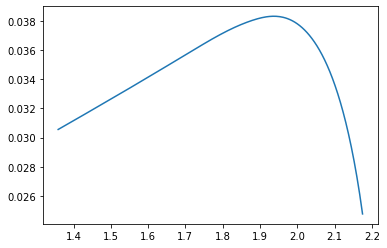

In [18]:
hc=4.14*3*100
cut['ef']=hc/cut['lambda']
cut['sqrt']=np.sqrt(cut.alpha*cut.ef)
cut['sqrd']=(cut.alpha*cut.ef)**2
plt.plot(cut.ef,cut.sqrt)

In [19]:
cut.to_excel("tabla.xlsx")